In [1]:
import numpy as np
import pandas as pd
import zipfile



In [ ]:
dataset = pd.read_csv('/content/placement.csv')
dataset

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1



#Outlier Detection and Removal using Z-score Method


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cols = dataset.columns
cols

Index(['cgpa', 'placement_exam_marks', 'placed'], dtype='object')

<ipython-input-12-eebcd34a2b9b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


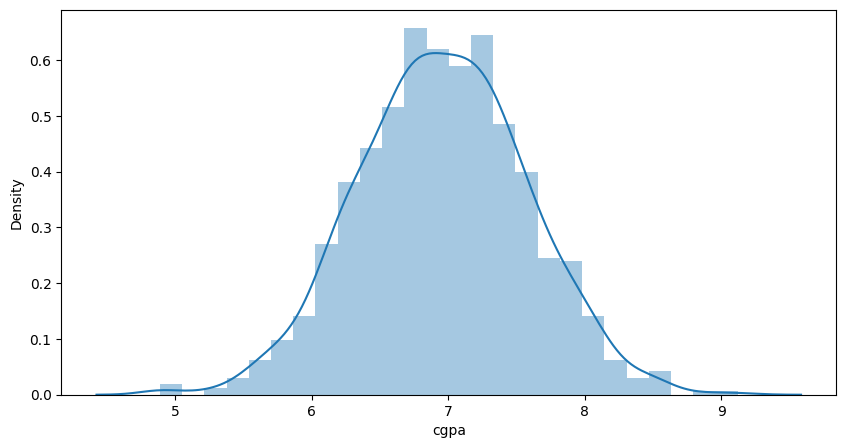

<ipython-input-12-eebcd34a2b9b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


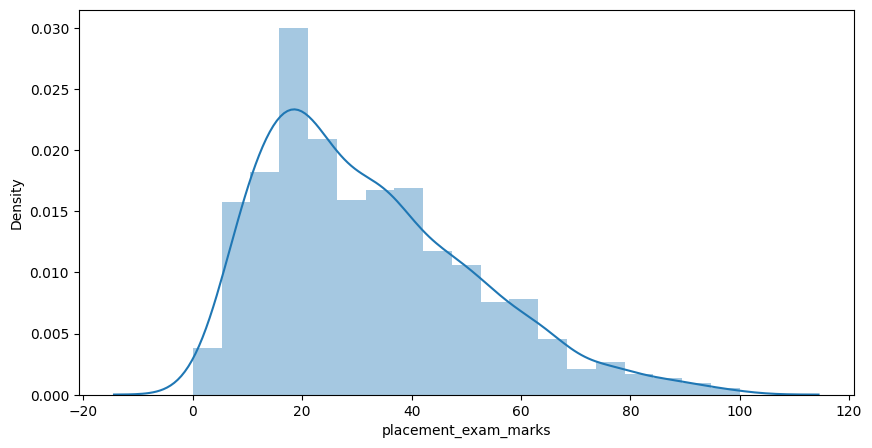

<ipython-input-12-eebcd34a2b9b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[i])


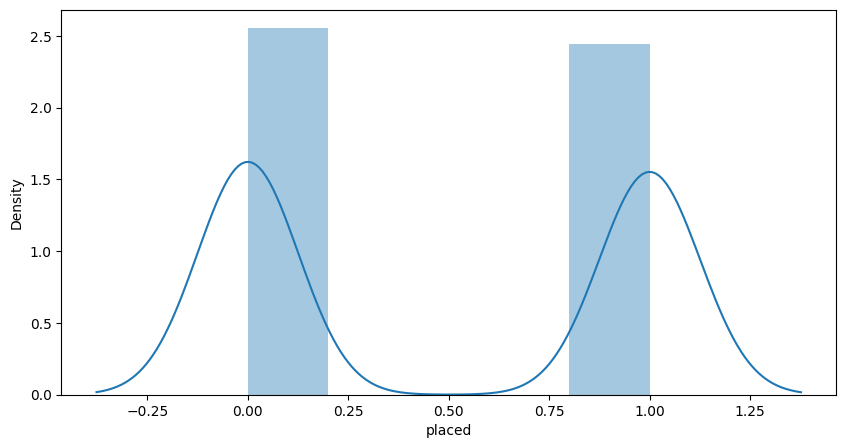

In [ ]:
for i in cols:
  plt.figure(figsize=(10,5))
  sns.distplot(dataset[i])
  plt.show()

##cgpa almost normally distributed

In [ ]:
print('max value of density',dataset['cgpa'].max())
print('min value of density',dataset['cgpa'].min())
print('mean value of density',dataset['cgpa'].mean())
print('std value of density',dataset['cgpa'].std())

max value of density 9.12
min value of density 4.89
mean value of density 6.96124
std value of density 0.6158978751323894


In [ ]:
print('Highest allowed value', dataset['cgpa'].mean() + 3*dataset['cgpa'].std())
print('Minimam allowed value', dataset['cgpa'].mean() - 3*dataset['cgpa'].std())

Highest allowed value 8.808933625397168
Minimam allowed value 5.113546374602832


In [ ]:
# find the outlier row
dataset[(dataset['cgpa']>8.808) | (dataset['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Trimming

In [ ]:
new_dataset = dataset[(dataset['cgpa']< 8.808) & (dataset['cgpa'] > 5.11)]

In [ ]:
new_dataset.shape

(995, 3)

In [ ]:
dataset['cgpa_zscore'] = (dataset['cgpa'] - dataset['cgpa'].mean()) / dataset['cgpa'].std()

In [ ]:
dataset

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [ ]:
dataset = dataset[(dataset['cgpa_zscore'] < 3) & (dataset['cgpa_zscore'] > -3)]
dataset.shape

(995, 4)

## Capping

In [ ]:
upper_value = dataset['cgpa'].mean() + 3*dataset['cgpa'].std()
lower_value = dataset['cgpa'].mean() - 3*dataset['cgpa'].std()
print(upper_value)
print(lower_value)

8.763601707753606
5.163111860085589


In [ ]:
dataset.loc[dataset['cgpa'] > upper_value, 'cgpa'] = upper_value
dataset.loc[dataset['cgpa'] < lower_value, 'cgpa'] = lower_value


In [ ]:
dataset

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.763602,44.0,1,3.099150
996,8.763602,65.0,1,3.505062
997,5.163112,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239


# Outlier Detection and Removal using the IQR Method

In [ ]:
print(dataset['cgpa'].skew())
dataset['placement_exam_marks'].skew()

-0.001476652452770556


0.8356419499466834

In [ ]:
dataset['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


<Axes: ylabel='placement_exam_marks'>

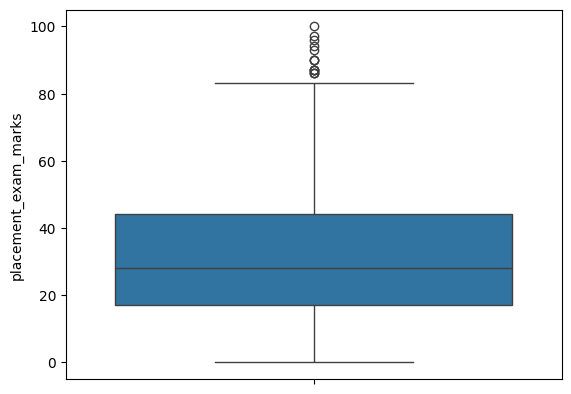

In [ ]:
sns.boxplot(dataset['placement_exam_marks'])

In [ ]:
#Determine IQR
per_25 = dataset['placement_exam_marks'].quantile(.25)
per_75 = dataset['placement_exam_marks'].quantile(.75)

In [ ]:
iqr = per_75 - per_25

In [ ]:
upper_limit = per_75 + 1.5*iqr
lower_limit = per_25 - 1.5*iqr

In [ ]:
dataset[(dataset['placement_exam_marks'] > upper_limit) | (dataset['placement_exam_marks'] < lower_limit)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
9,7.75,94.0,1,1.280667
40,6.60,86.0,1,-0.586526
61,7.51,86.0,0,0.890992
134,6.33,93.0,0,-1.024910
162,7.80,90.0,0,1.361849
283,7.09,87.0,0,0.209061
290,8.38,87.0,0,2.303564
311,6.97,87.0,1,0.014223
324,6.64,90.0,0,-0.521580
630,6.56,96.0,1,-0.651472


##Trimming

In [ ]:
new_dataset_2 = dataset[(dataset['placement_exam_marks'] < upper_limit) & (dataset['placement_exam_marks'] > lower_limit)]

<ipython-input-71-4915f596c6f5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['placement_exam_marks'])
<ipython-input-71-4915f596c6f5>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_dataset_2['placement_exam_marks'])


<Axes: ylabel='placement_exam_marks'>

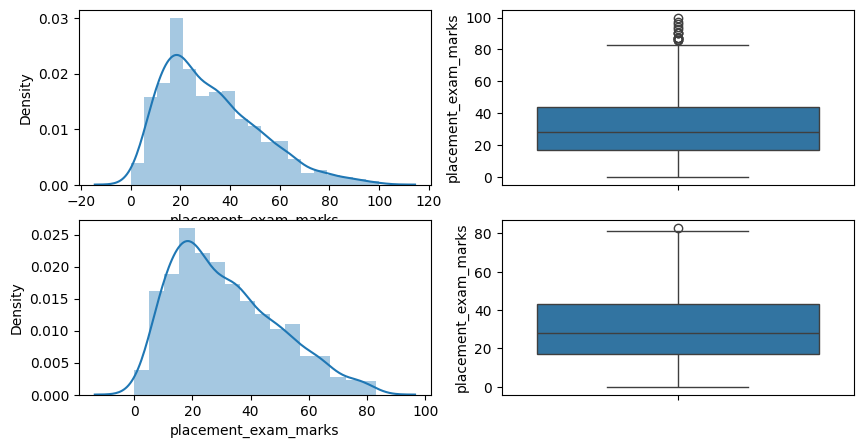

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(dataset['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(dataset['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_dataset_2['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_dataset_2['placement_exam_marks'])

## Capping

In [ ]:
new_cap = dataset.copy()
new_cap['placement_exam_marks'] = np.where(
    new_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_cap['placement_exam_marks']
    )
)

##Outlier Detection using the Percentile Method

In [2]:
dataset_2 = pd.read_csv('/content/weight-height.csv')
dataset_2

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<ipython-input-4-d946563c9ffd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_2['Height'])


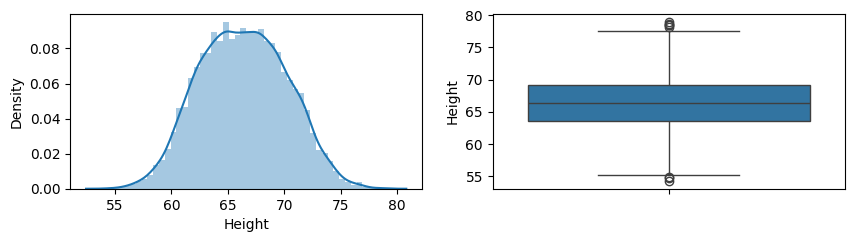

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.distplot(dataset_2['Height'])

plt.subplot(2,2,2)
sns.boxplot(dataset_2['Height'])

plt.show()

In [5]:
upper_limit = dataset_2['Height'].quantile(.99)
lower_limit = dataset_2['Height'].quantile(0.01)

In [9]:
print(upper_limit)
print(lower_limit)

74.7857900583366
58.13441158671655


##Capping

In [10]:
#also called Winsorization
dataset_2['Height']  = np.where(
    dataset_2['Height'] > upper_limit,
    upper_limit,
    np.where(
        dataset_2['Height'] < lower_limit,
        lower_limit,
        dataset_2['Height']
    )
)

In [11]:
dataset_2.shape

(10000, 3)

<Axes: ylabel='Height'>

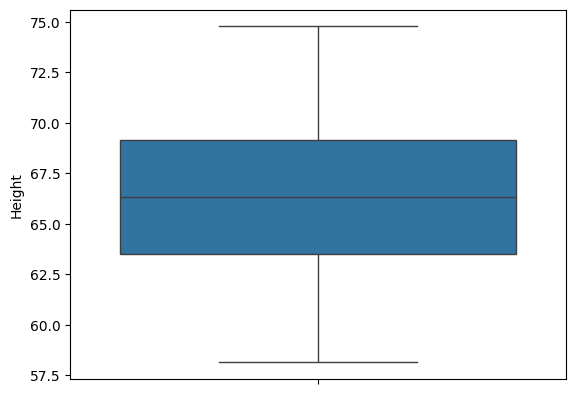

In [12]:
sns.boxplot(dataset_2['Height'])